In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

## Iris data

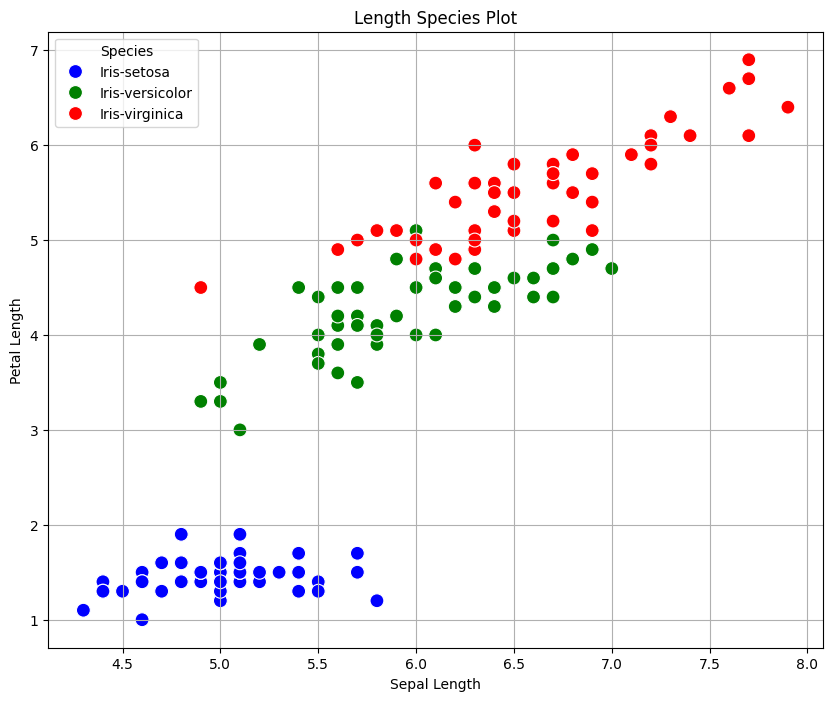

In [2]:
# Read data
df=pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv")

#  Custom palette for species
custom_palette = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

# Scatterplot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df, 
    x="sepal_length", 
    y="petal_length", 
    hue="species", 
    palette=custom_palette, 
    s=100
)

plt.title("Length Species Plot")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend(title="Species")
plt.grid(True)

plt.show()

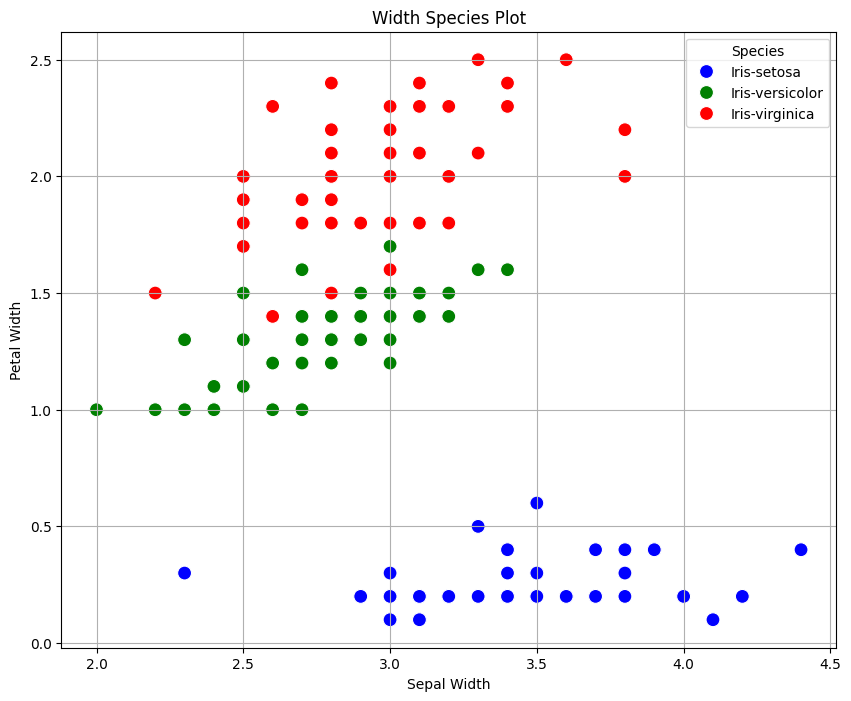

In [3]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df, 
    x="sepal_width", 
    y="petal_width", 
    hue="species", 
    palette=custom_palette, 
    s=100
)

plt.title("Width Species Plot")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend(title="Species")
plt.grid(True)

plt.show()

The scatterplots show that for Iris-versicolor and Iris-virginica, bigger sepals usually mean bigger petals. Iris-setosa is different, with much smaller petals and no clear pattern. The boxplots show Iris-setosa has wide sepals but very small petals, Iris-virginica has the biggest sepals and petals, and Iris-versicolor is in the middle.

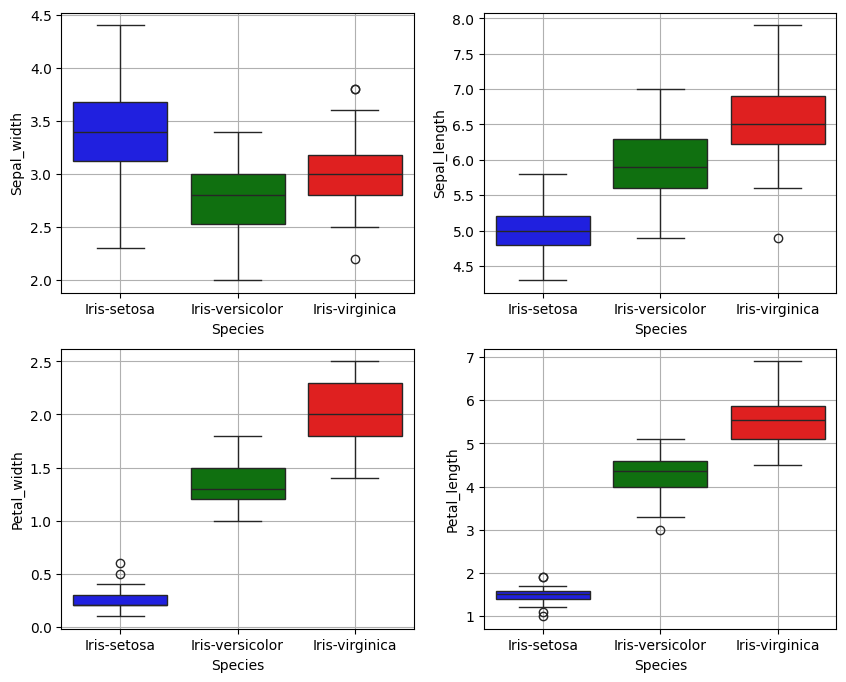

In [4]:
# List of variables to create box plots
variables = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

# Set up the figure for all the boxplots in one column
plt.figure(figsize=(10, 8))

# Box plot
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)  # Automatically arrange subplots in 2x2 grid
    sns.boxplot(data=df, x="species", y=var, hue="species", palette=custom_palette, legend=False)
    
    plt.xlabel("Species")
    plt.ylabel(var.capitalize())
    plt.grid(True)

plt.show()

Iris-virginica has the longest petals and sepals, as well as the widest petals, which makes it stand out. Iris-versicolor falls in the middle, with measurements that overlap a bit with both Iris-setosa and Iris-virginica, especially for sepals

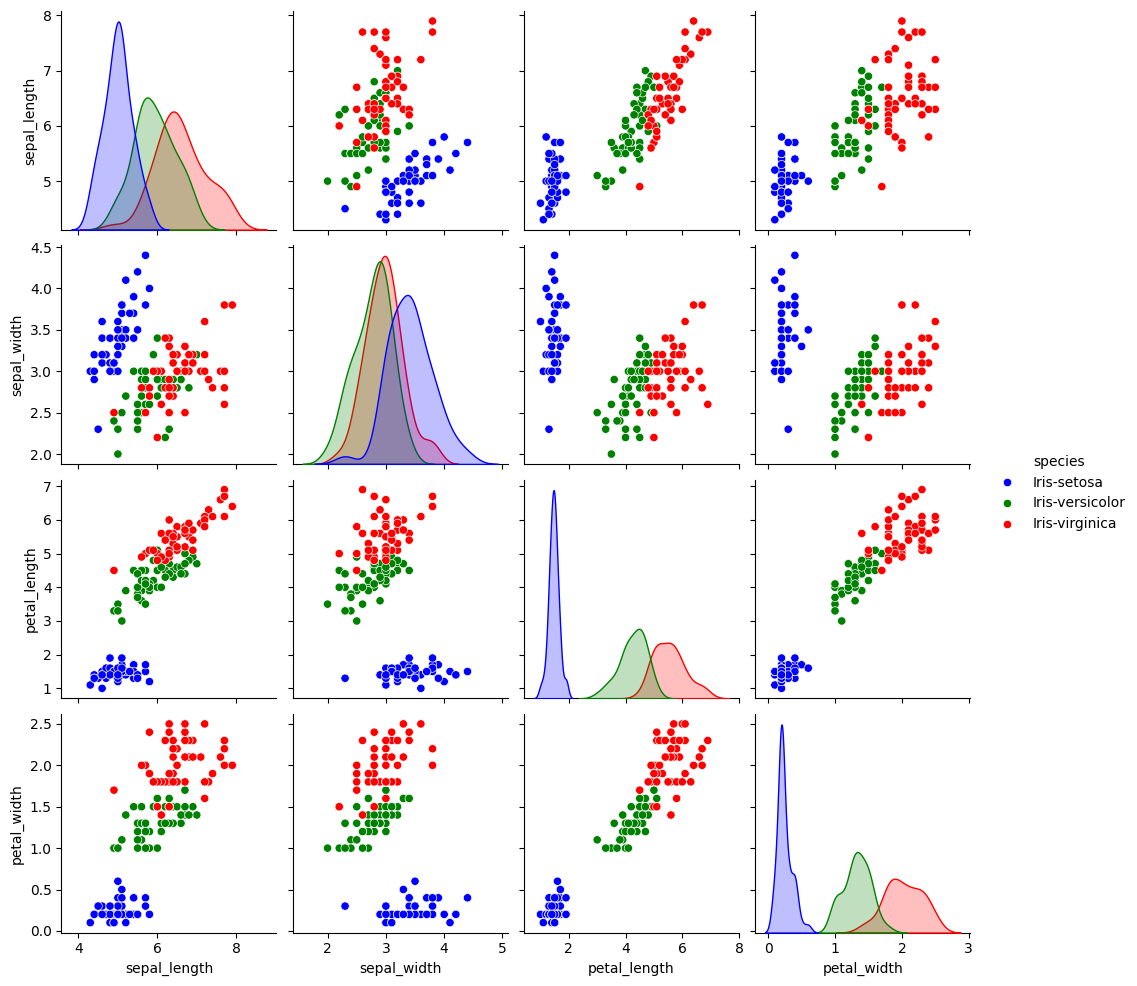

In [5]:
sns.pairplot(df, hue = 'species', palette=custom_palette)

Petal length and width are the best for telling the Iris species apart since they show clear patterns and no overlap. Sepal length helps a bit, but sepal width isn’t very useful because the species overlap too much. Petals are the most useful for separating the species.

# Birdwatching

### What are the most prevalent species?

In [6]:
df_bird = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv')

# Making sure'Antal' column is numbers
df_bird['Antal'] = pd.to_numeric(df_bird['Antal'], errors='coerce')

# Add up the numbers for each bird and sort them
most_prevalent_species = df_bird.groupby('Artnamn')['Antal'].sum().sort_values(ascending=False).head(3)

print(most_prevalent_species.index.tolist())

['Grönsiska', 'Sothöna', 'Gräsand']


### What is the monthly distribution of the top 3 most prevelant species?

In [7]:
# Get the month from the 'Startdatum' column
df_bird['Startdatum'] = pd.to_datetime(df_bird['Startdatum'], errors='coerce')
df_bird['Month'] = df_bird['Startdatum'].dt.month

# Pick the top 3 species and see how they are spread out each month
monthly_distribution = (df_bird[df_bird['Artnamn'].isin(most_prevalent_species.index)].groupby(['Artnamn', 'Month'])['Antal'].sum().unstack())

print(monthly_distribution)

Month            1       2       3      4      5      6
Artnamn                                                
Gräsand     2953.0  1583.0  1152.0  858.0  515.0  106.0
Grönsiska  19507.0   648.0    33.0    6.0   10.0    7.0
Sothöna     2142.0  2100.0  3052.0  614.0  288.0  112.0


### What are the rarest speices?

In [8]:
# Add up the numbers for each bird
species_counts = df_bird.groupby('Artnamn')['Antal'].sum()

# Species observed only once
rarest_species = species_counts[species_counts == 1]

print(rarest_species)

Artnamn
Bivråk                       1.0
Bändelkorsnäbb               1.0
Ejder                        1.0
Fjällvråk                    1.0
Forsärla                     1.0
Gravand                      1.0
Lappsparv                    1.0
Ormvråk, underarten buteo    1.0
Rosenfink                    1.0
Röd glada                    1.0
Rödbena                      1.0
Spillkråka                   1.0
Storlom                      1.0
Strömstare                   1.0
Tornfalk                     1.0
Trädlärka                    1.0
Varfågel                     1.0
Vinterhämpling               1.0
Ägretthäger                  1.0
Name: Antal, dtype: float64


## 3 own questions

### Which species have the most entries (not the total number of individuals, but the most rows of data)?

In [9]:
species_observation_count = df_bird['Artnamn'].value_counts().head(10)
print(species_observation_count)

Artnamn
Koltrast      718
Talgoxe       631
Blåmes        629
Gräsand       531
Storskrake    522
Sothöna       513
Gärdsmyg      486
Ringduva      480
Skogsduva     476
Bofink        452
Name: count, dtype: int64


The species with the most entries in the dataset is Koltrast with 718 rows, followed by Talgoxe with 631 rows, and Blåmes with 629 rows. These species are the most frequently reported ones in terms of observation entries, highlighting their prominence in the dataset.

### How do the total number of observations vary across seasons?

In [11]:
# Get the month from the 'Startdatum' column
df_bird['Startdatum'] = pd.to_datetime(df_bird['Startdatum'], errors='coerce')
df_bird['Month'] = df_bird['Startdatum'].dt.month

# Define seasons
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
df_bird['Season'] = df_bird['Month'].map(seasons)

# Count observations per season
season_observations = df_bird['Season'].value_counts()

print("observations per season:")
print(season_observations)

observations per season:
Season
Spring    15119
Winter     5201
Summer     1596
Name: count, dtype: int64


Spring has the highest number of total bird observations, followed by winter. Summer has significantly fewer observations which might indicate that birdwatching activity is most prominent during spring likely due to higher bird activity during migration and breeding seasons.

### Which individual has submitted the most bird observation reports?

In [12]:
user_sightings = df_bird['Rapportör'].value_counts()

print("User with the most bird sightings:")
print(user_sightings.head(1))


User with the most bird sightings:
Rapportör
Svante Söderholm    5428
Name: count, dtype: int64


Svante Söderholm has submitted the highest number of bird observation reports, totaling 5,428 entries. This indicates their significant contribution to the dataset and potentially reflects a highly active observer or citizen scientist.

# Predicting strokes

In [29]:
df_strokes = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv')
print(df_strokes.info())
print(df_strokes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

The dataset gives information about factors linked to strokes. It includes data on 5,110 people, covering medical, lifestyle, and demographic details. For each person, we know their gender, age, if they have hypertension or heart disease, their marital status, work type, residence type, average glucose level, BMI, and smoking habits. The dataset also shows if they had a stroke or not.

From exploring the data, we see that strokes happen more often in older people. People with higher glucose levels are also more likely to have strokes, showing a possible link to blood sugar problems. BMI is slightly higher in stroke cases, but the connection isn’t as strong.

# 3 questions:

## Do stroke cases differ between genders?

In [6]:
df_strokes["gender"].value_counts(dropna = False)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [5]:
strokes_gender = df_strokes.loc[:,["gender","stroke"]]
strokes_gender_grouping = strokes_gender.groupby(["gender"]).sum(["stroke"])
strokes_gender_grouping.head()

,stroke
gender,
Female,141
Male,108
Other,0


In [11]:
gender_counts = df_strokes["gender"].value_counts(dropna=False)
strokes_gender_grouping["total_population"] = gender_counts

# percentage of stroke cases for each gender
strokes_gender_grouping["stroke_percentage"] = (strokes_gender_grouping["stroke"] / strokes_gender_grouping["total_population"]) * 100

print(strokes_gender_grouping)

        stroke  total_population  stroke_percentage
gender                                             
Female     141              2994           4.709419
Male       108              2115           5.106383
Other        0                 1           0.000000


Even though more women had strokes overall, men have a slightly higher percentage of strokes when we compare based on population size. This might mean men are at a slightly higher risk of strokes in this dataset.

## Is there a relationship between lifestyle factors like smoking status, work type, residence type with stroke risk?

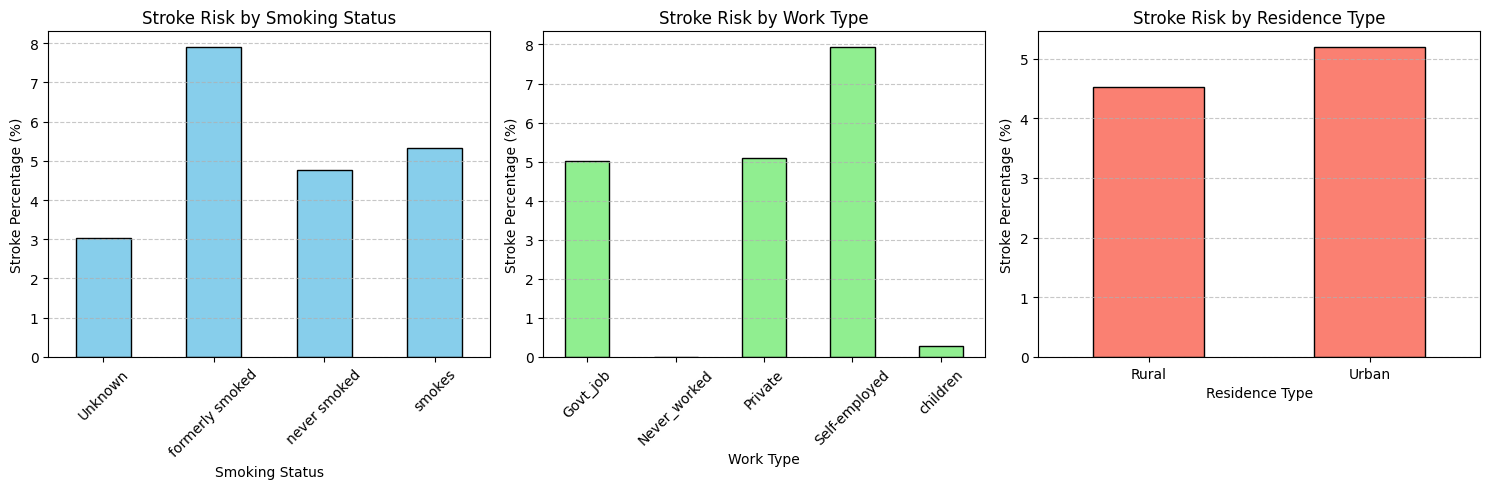

In [42]:
lifestyle_factors = df_strokes[["smoking_status", "work_type", "Residence_type", "stroke"]]

# Group by each lifestyle factor and calculate stroke percentages
smoking_stroke = (lifestyle_factors.groupby("smoking_status")["stroke"].mean() * 100).round(2)
work_stroke = (lifestyle_factors.groupby("work_type")["stroke"].mean() * 100).round(2)
residence_stroke = (lifestyle_factors.groupby("Residence_type")["stroke"].mean() * 100).round(2)

# Plotting the results
plt.figure(figsize=(15, 5))

# Smoking status
plt.subplot(1, 3, 1)
smoking_stroke.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Stroke Risk by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Stroke Percentage (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Work type
plt.subplot(1, 3, 2)
work_stroke.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Stroke Risk by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Stroke Percentage (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Residence type
plt.subplot(1, 3, 3)
residence_stroke.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Stroke Risk by Residence Type")
plt.xlabel("Residence Type")
plt.ylabel("Stroke Percentage (%)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

There appears to be a relationship between lifestyle factors and stroke risk. Smoking especially formerly smoking, being self-employed, and living in urban areas are associated with higher stroke percentages.

## Does being married lower or raise the chance of having a stroke?

In [39]:
marriage_stroke = (df_strokes.groupby("ever_married")["stroke"].mean() * 100).round(2)

print("Stroke Percentage by Marital Status:", marriage_stroke)

Stroke Percentage by Marital Status: ever_married
No     1.65
Yes    6.56
Name: stroke, dtype: float64


This may suggest that married individuals in the dataset are at higher risk, possibly due to age or other factors (married individuals may be older, which naturally increases stroke risk).

# Data preperation

## Cleaning data

In [26]:
df_data = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv")

# Function to convert string values to numeric
def convert_to_numeric(value):
    if isinstance(value, str):
        multipliers = {'k': 1e3, 'M': 1e6, 'B': 1e9}
        try:
            return float(value[:-1]) * multipliers.get(value[-1], 1)
        except ValueError:
            return np.nan  # Handle invalid entries
    return value  # If not a string, return as-is

# Apply conversion function to all columns except 'iso-3'
for col in df_data.columns[1:]:
    df_data[col] = df_data[col].apply(convert_to_numeric)

# Convert remaining non-numeric columns to numeric and handle missing values
df_data.update(df_data[df_data.columns[1:]].apply(pd.to_numeric, errors='coerce'))  # Coerce non-numeric entries to NaN
df_data[df_data.columns[1:]] = df_data[df_data.columns[1:]].ffill(axis=1)  # Use ffill() to forward-fill missing values across years

# Filter columns and sort by 2015
sorted_df = df_data[['iso-3', '2015', '2016', '2017', '2018', '2019']].sort_values(by='2015', ascending=False)

sorted_df.head()

,iso-3,2015,2016,2017,2018,2019
35,CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
87,IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
200,USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.220000e+08
86,IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
26,BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.070000e+08


To clean the data I started by converting string values into numeric values using a custom function that handled multipliers. Invalid entries were replaced with NaN to standardize the dataset. Then I used forward-filling to fill missing values, assuming that cell phone numbers usually stay the same or grow over time. I filtered the data to focus on key columns and sorted it by 2015 values.